In [ ]:
#load library
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from matplotlib import pyplot
import numpy as np
import math

In [ ]:
#load data
(train_x, train_y), (test_x, test_y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#split data
num_data = 500
train_x = train_x [ :num_data]
train_y = train_y [ :num_data]

print(train_x.shape)
print(train_y.shape)


(500, 28, 28)
(500,)


In [ ]:
np.set_printoptions(linewidth=200)
print(np.array(train_x[400]))

#praproses
x = np.array([[[1 if dd > 0 else 0 for dd in m] for m in x] for x in train_x])
print(np.array(x[400]))

print(train_y[400])
y = to_categorical ( train_y)
print(y[400])
x = np.array([x.flatten() for x in x])
print(x[400])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  38 113 207 253 255 253 143  38   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  38 219 252 252 252 253 252 252 234 146   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 191 252 239 180  55 196 214 252 252 252  57   6   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 101 176  65   0   0   0  28 199 252 252 253  43   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  25 205 252 253 167   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  29 253 255 253 196   0   

In [ ]:
#mlp 
input = x
target = y


#config
num_input = input.shape[1]
num_hidden = 30
num_output = target.shape[1]

#fungsi sigmoid
def sigmoid(x):
  return 1/(1 + math.exp(-x))

sig = np.vectorize(sigmoid)

#inisialisasi bobot dan bias
b_hidden = np.random.uniform(low=-1, high=1, size=(num_hidden))
w_hidden = np.random.uniform(low=-1, high=1, size =(num_input,num_hidden))

b_output = np.random.uniform(low=-1, high=1, size=(num_output))
w_output = np.random.uniform(low=-1, high=1, size =(num_hidden,num_output))

#simpat loss dan accuracy
loss_values = []
acc_values = []

lr = 0.5
epochs = 100


for b in range(epochs):
  MSE = 0
  new_taget = np.zeros(target.shape)

  for idx, inp in enumerate(input):
    #batch

    #--feedforward
    o_hidden = np.matmul(input[idx], w_hidden) + b_hidden
    o_hidden = sig(o_hidden)

    o_output = np.matmul(o_hidden,w_output)
    o_output = sig(o_output)

    #----error
    error = target[idx] - o_output

    MSE = MSE + (np.sum((error**2))/error.shape)

    new_taget[idx]= o_output.round()

    #---backpropagation
    eh = error @ w_output.T
    w_output = w_output + (lr* ((error * o_output * ( 1 - o_output)) * o_hidden[np.newaxis].T))
    w_hidden = w_hidden + (lr* ((eh * o_hidden * (1 - o_hidden)) * input[idx][np.newaxis].T))

    b_output = b_output + (lr* ((error * o_output * ( 1 - o_output))))
    b_hidden = b_hidden + (lr* ((eh * o_hidden * (1-o_hidden) ))) 

  MSE = (MSE/input[0])

  delta = np.absolute(target - new_taget)
  acc = 1 - np.average([np.max(m) for m in delta])

  acc_values.append(acc)
  loss_values.append(MSE)
  print("Epoch", b, "/", epochs,": error", MSE, "accuracy:", acc)

In [ ]:
dx = np.array
([
            [[1,2,0,0,0,3],
            [1,2,0,4,0,3]],

            [[1,2,0,0,0,3],
            [1,2,0,4,0,3]],
])
def two_hot(y):
  return [one_hot(m) for m in y]

def one_hot(x):
  return [1 if dd > 0 else 0 for dd in x]

c = np.array([two_hot(x) for x in dx])


print ( d )
print ( c )


TypeError: ignored

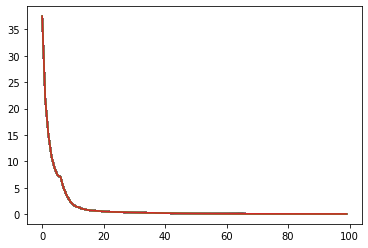

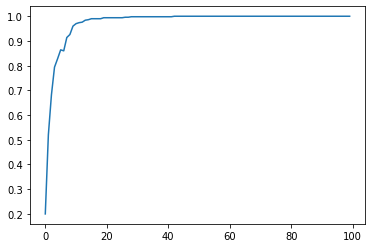

In [ ]:
import matplotlib.pyplot as plt
plot1 = plt.figure(1)
plt.plot(loss_values)
plt.show()

plot2 = plt.figure(2)
plt.plot(acc_values)
plt.show()

In [ ]:
new_target_test = np.zeros(target.shape)

#forforward
for idx, inp in enumerate(input):
    o_hidden = np.matmul(input[idx], w_hidden) + b_hidden
    o_hidden = sig(o_hidden)
    o_output = np.matmul(o_hidden,w_output)
    o_output = sig(o_output)

    new_target_test[idx]= o_output.round(0)
                  

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 

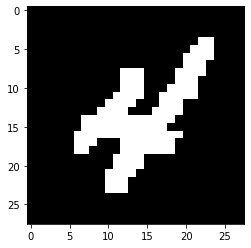

In [ ]:
#image ke
idx_text = 0

#resphase
reshape_input = input.reshape(num_data,28,28)

print(reshape_input[idx_test])
#test
test_target = new_target_test [idx_test]
print(test_target)

#print label
max_index_row = np.argmax(test_target)
print(max_index_row)

from matplotlib import pyplot
pyplot.imshow(reshape_input[idx_test], cmap=pyplot.get_cmap('gray'))
pyplot.show()


In [ ]:
np.set_printoptions(linewidth=200
                    
#load data
(train_x, train_y), (test_x, test_y) = mnist.load_data()

num_test = 100
test_x = test_x[:num_test]
test_y = test_y[:num_test]

##praproses
#one hot input
x_test = np.array([[[1 if dd > 0 else 0 for dd in m] for m in x] for x in test_x])
#one hot output
y_test = to_categorical(test_y)
#flater
x_test = np.array([x.flatten() for x in x_test])

SyntaxError: ignored

In [113]:
new_target_test_eval = np.zeros(y_test.shape)


#feedforward
for idx, inp in enumerate(x_test):
  o_hidden = np.matmul(x_test[idx], w_hidden) + b_hidden
  o_hidden = sig(o_hidden)
  o_output = np.matmul(o_hidden,w_output)
  o_output = sig(o_output)

  new_target_test_eval[idx]= o_output.round()

NameError: ignored

In [ ]:
#image ku
idx_test = 9

#reshape
reshape_input_test = x_test.reshape(num_test,28,28)
print(reshape_input_test[idx_test])

#test
test_target = new_target_test_eval [ idx_test]
print(test_target)

#print label target
max_index_row = np.argmax(test_target)
print("class", max_index_row)
print("target", test_y[idx_test])

from matplotlib import pyplot
pyplot.imshow(reshape_input_test[idx_test], cmap-pyplot.get_cmap('gray'))



NameError: ignored

In [ ]:
err = 0
acc = 0

print(new_target_test_eval.shape)


for test_idx, i in enumerate(new_target_test_eval):

  class_target = new_target_test[test_idx]
  class_target_number = np.argmax(class_target)

  target_tes = test_y[test_idx]

  #selisih
  sigma = np.absolute(class_target_number - target_tes)

  if sigma > 0: err += 1
  if sigma == 0: acc +=1

error = err/num_test
accuracy = acc/num_test

print ("error: ", error)
print ("accuracy: ", accuracy)

NameError: ignored